<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-python-for-data-analysis/blob/main/Dibimbing_Python_for_Data_Analysis_Part_03_(Hands_On).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = pd.read_csv('cleaned_titanic.csv')
apartment = pd.read_csv('apartdata.csv')
apartment = apartment[(apartment['Currency'] == 'IDR')]

In [ ]:
titanic

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,MedianAge,Age Class
0,0,male,22.0,1,0,7.2500,S,Third,28.25,Young Adult
1,1,female,38.0,1,0,71.2833,C,First,27.00,Adult
2,1,female,26.0,0,0,7.9250,S,Third,29.00,Young Adult
3,1,female,35.0,1,0,53.1000,S,First,29.00,Adult
4,0,male,35.0,0,0,8.0500,S,Third,28.25,Adult
...,...,...,...,...,...,...,...,...,...,...
884,0,male,27.0,0,0,13.0000,S,Second,28.25,Young Adult
885,1,female,19.0,0,0,30.0000,S,First,29.00,Teen
886,0,female,25.0,1,2,23.4500,S,Third,25.00,Young Adult
887,1,male,26.0,0,0,30.0000,C,First,26.50,Young Adult


In [ ]:
apartment

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


### Correlation

Correlation ideally should be done on numerical and numerical data. Let's do a few ones:
- Is there a correlation between Age and Fare?
- Is there a correlation between Area and Annual Price?

In [ ]:
np.corrcoef(titanic['Age'], titanic['Fare'])

array([[1.        , 0.09633121],
       [0.09633121, 1.        ]])

We find that there's a 0.09 pearson correlation between 'Age' and 'Fare'.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

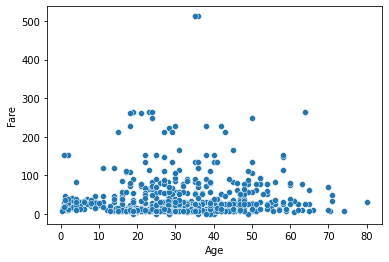

In [ ]:
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare')

Yup, doesn't seem to be strongly correlated.

What about the apartment data?

In [ ]:
np.corrcoef(apartment['Area'], apartment['Annual_Price'])

array([[1.        , 0.23074523],
       [0.23074523, 1.        ]])

<AxesSubplot:xlabel='Area', ylabel='Annual_Price'>

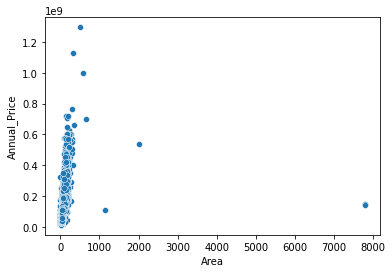

In [ ]:
sns.scatterplot(data = apartment, x = 'Area', y = 'Annual_Price')

Outliers can heavily affect correlation score. We would think that Area of an apartment would be highly correlated to the price, but it doesn't seem to be the case here - because we have a few apartments who have very high Area, but low price. 

Let's see what's going on here.

In [ ]:
apartment[apartment['Area'] > 1000]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
4583,The Accent 2BR,2,1,Bintaro,Jakarta Selatan,106.723300,-6.274000,1,7781.0,Tower Tower B,11,IDR,150000000
4802,Kemang Village Apartment 3BR Fully Furnished,3,3,Kemang,Jakarta Selatan,106.811453,-6.259374,1,2014.0,Tower Bloomington,22,IDR,540000000
4855,The Accent Bintaro,2,1,Bintaro,Jakarta Selatan,106.723300,-6.274000,1,7781.0,Tower The accent,11,IDR,140000000
5019,Maqna Residence 3+1BR Tower 1,3,2,Kebon Jeruk,Jakarta Barat,106.761852,-6.196997,0,1138.0,Tower 1,9,IDR,110000000


What if we remove these 4 apartments?

In [ ]:
subset_apartment = apartment[apartment['Area']<1000]

In [ ]:
np.corrcoef(subset_apartment['Area'], subset_apartment['Annual_Price'])

array([[1.        , 0.83528768],
       [0.83528768, 1.        ]])

<AxesSubplot:xlabel='Area', ylabel='Annual_Price'>

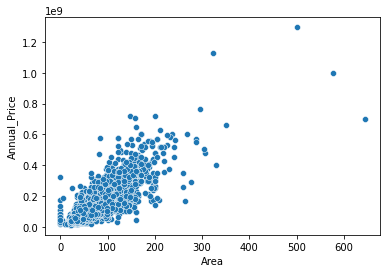

In [ ]:
sns.scatterplot(data = subset_apartment, x = 'Area', y = 'Annual_Price')

Much better. But there are still some lingering problems, in which you'll try to solve in homework. 

Question: but in the real world, should we remove outliers so we can get a good correlation score?

No. You shouldn't do that. This is what you should do:
- Do visualization and exploration to detect the outliers (using plots / pandas profiling)
- Report your findings to your manager / external stakeholders
- Make them aware of the presence of such outliers (or extreme values)
- Discuss what could be done with them - and give clear, strong arguments on why these data points should NOT be included in our analysis (because they're rare and it's not the 'usual' value for apartments)
- Hear their feedback, and agree upon something
- Move forward with that agreement, now with everyone AWARE of the problem

Next we'll learn how to create a correlation heatmap. Let's say we want to know the correlation between more than 2 numerical variables. How should we do it?

In [ ]:
apart_numerical_cols = ['Longitude', 'Latitude', 'Area', 'Annual_Price']

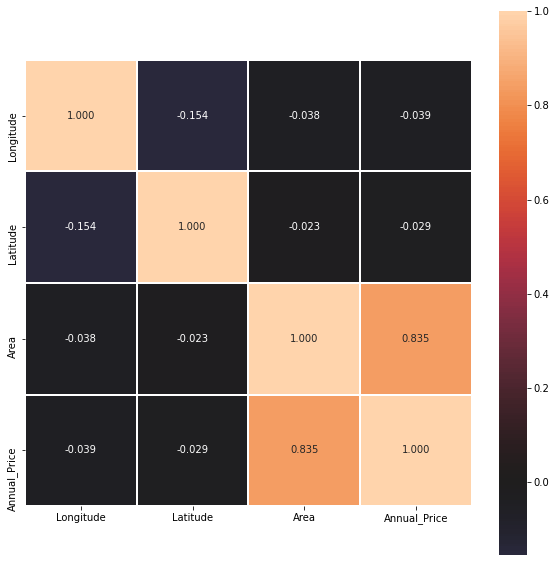

In [ ]:
fig = plt.figure(figsize = (10,10))
matrix = np.triu(subset_apartment[apart_numerical_cols].corr())
sns.heatmap(subset_apartment[apart_numerical_cols].corr(), center = 0,
           fmt='.3f', square = True,
           annot = True, linewidth = 0.3)
plt.show()

### Chi Square Goodness of Fit Test

H0: Distribusi Apartment di Jakarta adalah:
- Jakarta Selatan: 30%
- Jakarta Pusat: 30%
- Jakarta Barat: 20%
- Jakarta Utara: 15%
- Jakarta Timur: 5%


Hipotesis alternatif: Distribusi Apartment di Jakarta tidaklah mengikuti distribusi ekspektasi di atas

#### Step 1: Dapatkan Actual Distribution of Apartment in Jakarta

In [ ]:
apart_dist_jkt = apartment['Region'].value_counts().reset_index().head(5)

In [ ]:
apart_dist_jkt
pip install scipy

SyntaxError: invalid syntax (1371003294.py, line 2)

#### Step 2: Lengkapi tabel dengan 'expected' distribution

In [ ]:
apart_dist_jkt['Expectation Ratio'] = [0.3, 0.2, 0.3, 0.15, 0.05]
apart_dist_jkt['Expectation'] = apart_dist_jkt['Region'].sum() * apart_dist_jkt['Expectation Ratio']

In [ ]:
apart_dist_jkt

,index,Region,Expectation Ratio,Expectation
0,Jakarta Selatan,1478,0.30,1409.4
1,Jakarta Barat,1346,0.20,939.6
2,Jakarta Pusat,1080,0.30,1409.4
3,Jakarta Utara,422,0.15,704.7
4,Jakarta Timur,372,0.05,234.9


In [ ]:
apart_dist_jkt.columns = ['City', 'Observed', 'ExpRatio', 'Expectation']

In [ ]:
apart_dist_jkt

,City,Observed,ExpRatio,Expectation
0,Jakarta Selatan,1478,0.30,1409.4
1,Jakarta Barat,1346,0.20,939.6
2,Jakarta Pusat,1080,0.30,1409.4
3,Jakarta Utara,422,0.15,704.7
4,Jakarta Timur,372,0.05,234.9


#### Step 3: Lakukan Chi Square Test

In [ ]:
from scipy import stats
chi_square_test_statistic, p_value = stats.chisquare(apart_dist_jkt['Observed'], apart_dist_jkt['Expectation'])

In [ ]:
chi_square_test_statistic

449.5308641975308

In [ ]:
p_value

5.486186446797149e-96

In [ ]:
p_value < 0.05

True

p-value = 0, artinya kita dapat menolak hipotesis nol. Ternyata distribusi apartment di Jakarta nggak seperti yang kita hipotesiskan. 

### Chi Square Test of Independence

This Chi Square Test measures if 2 categorical variables are independent or dependent of each other.

If 2 categorical variables are independent of one another, it means that we can conclude that they both does not have a strong relationship.

However, if 2 categorical variables are dependent from each other, it means that they have a strong relationship between them.

In [ ]:
# Importing Extra Packages
import scipy.stats as stats
from scipy.stats import chi2

In [ ]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,231,109


In [ ]:
def chisq_test(data, target_column, feature_column, alpha = 0.05):
    ct = pd.crosstab(data[target_column], data[feature_column])
    chisq_stat, pval, deg_of_free, expected = stats.chi2_contingency(ct)
    
    print(f'Chi Square Test Result Between {target_column} and {feature_column}')
    print(f'H0: There is no substantial relationship between the two variables')
    print(f'H1: There is a substantial relationship between the two variables')
    print('----------')
    print('')
    print(f'Chi Square Statistic: {chisq_stat:.5g}')
    print(f'P-Value: {pval:.5g}')
    print(f'Degress of Freedom: {deg_of_free}')
    print('')
        
    if pval > alpha:
        print(f'P-Value is greater than alpha ({alpha}), therefore we cannot reject H0.')
        print(f'This means, there is no substantial relationship between {target_column} and {feature_column}.')
    else:
        print(f'P-Value is less than alpha ({alpha}), therefore we can reject H0.')
        print(f'We are sure, with {alpha} statistical significance, that there is a substantial relationship between {target_column} and {feature_column}.')
        

In [ ]:
chisq_test(data = titanic, target_column = 'Survived', feature_column = 'Sex')

Chi Square Test Result Between Survived and Sex
H0: There is no substantial relationship between the two variables
H1: There is a substantial relationship between the two variables
----------

Chi Square Statistic: 258.43
P-Value: 3.7799e-58
Degress of Freedom: 1

P-Value is less than alpha (0.05), therefore we can reject H0.
We are sure, with 0.05 statistical significance, that there is a substantial relationship between Survived and Sex.


In [ ]:
chisq_test(data = titanic, target_column = 'Survived', feature_column = 'Age Class')

Chi Square Test Result Between Survived and Age Class
H0: There is no substantial relationship between the two variables
H1: There is a substantial relationship between the two variables
----------

Chi Square Statistic: 17.372
P-Value: 0.0016362
Degress of Freedom: 4

P-Value is less than alpha (0.05), therefore we can reject H0.
We are sure, with 0.05 statistical significance, that there is a substantial relationship between Survived and Age Class.


In [ ]:
chisq_test(data = titanic, target_column = 'Survived', feature_column = 'Class')

Chi Square Test Result Between Survived and Class
H0: There is no substantial relationship between the two variables
H1: There is a substantial relationship between the two variables
----------

Chi Square Statistic: 100.98
P-Value: 1.1814e-22
Degress of Freedom: 2

P-Value is less than alpha (0.05), therefore we can reject H0.
We are sure, with 0.05 statistical significance, that there is a substantial relationship between Survived and Class.


Okay. So far we've seen that all of the categorical features have a relationsheep with the target (Survived). What would the test result look like, if we have a completely random / unrelated categorical feature? 

In [ ]:
titanic_edit = titanic.copy()

In [ ]:
new_list = list(np.random.randint(low = 1,high = 4,size=889))
titanic_edit['FavoriteColor'] = new_list

Now we have a new column called 'FavoriteColor' in our edited dataset, and this column is completely random. 

In [ ]:
titanic_edit

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,MedianAge,Age Class,FavoriteColor
0,0,male,22.0,1,0,7.2500,S,Third,28.25,Young Adult,3
1,1,female,38.0,1,0,71.2833,C,First,27.00,Adult,2
2,1,female,26.0,0,0,7.9250,S,Third,29.00,Young Adult,3
3,1,female,35.0,1,0,53.1000,S,First,29.00,Adult,1
4,0,male,35.0,0,0,8.0500,S,Third,28.25,Adult,3
...,...,...,...,...,...,...,...,...,...,...,...
884,0,male,27.0,0,0,13.0000,S,Second,28.25,Young Adult,2
885,1,female,19.0,0,0,30.0000,S,First,29.00,Teen,1
886,0,female,25.0,1,2,23.4500,S,Third,25.00,Young Adult,2
887,1,male,26.0,0,0,30.0000,C,First,26.50,Young Adult,1


Let's transform it into a categorical feature (and not a numerical one)

In [ ]:
color_map = {
    1:'Red',
    2:'Green',
    3:'Blue'
}

titanic_edit['FavoriteColor'] = titanic_edit['FavoriteColor'].map(color_map)

In [ ]:
titanic_edit

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,MedianAge,Age Class,FavoriteColor
0,0,male,22.0,1,0,7.2500,S,Third,28.25,Young Adult,Blue
1,1,female,38.0,1,0,71.2833,C,First,27.00,Adult,Green
2,1,female,26.0,0,0,7.9250,S,Third,29.00,Young Adult,Blue
3,1,female,35.0,1,0,53.1000,S,First,29.00,Adult,Red
4,0,male,35.0,0,0,8.0500,S,Third,28.25,Adult,Blue
...,...,...,...,...,...,...,...,...,...,...,...
884,0,male,27.0,0,0,13.0000,S,Second,28.25,Young Adult,Green
885,1,female,19.0,0,0,30.0000,S,First,29.00,Teen,Red
886,0,female,25.0,1,2,23.4500,S,Third,25.00,Young Adult,Green
887,1,male,26.0,0,0,30.0000,C,First,26.50,Young Adult,Red


In [ ]:
chisq_test(data = titanic_edit, target_column = 'Survived', feature_column = 'FavoriteColor')

Chi Square Test Result Between Survived and FavoriteColor
H0: There is no substantial relationship between the two variables
H1: There is a substantial relationship between the two variables
----------

Chi Square Statistic: 2.9003
P-Value: 0.23453
Degress of Freedom: 2

P-Value is greater than alpha (0.05), therefore we cannot reject H0.
This means, there is no substantial relationship between Survived and FavoriteColor.


That's how it would look like if we have a categorical feature with no pattern/relationship with our target variable. 

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

First, let's define the predictor columns and the target column

In [ ]:
predictor_cols = ['No_Rooms', 'Bathroom', 'Longitude', 'Latitude', 'Furnished', 'Area', 'Total_Facilities']
target_col = ['Annual_Price']

Let's try doing Linear Regression on the `apartment` dataframe, before subsetting the 4 "too large" apartments

In [ ]:
linreg = LinearRegression()
linreg.fit(apartment[predictor_cols], apartment[target_col])

LinearRegression()

In [ ]:
linreg.score(apartment[predictor_cols], apartment[target_col]) #R2 Score

0.4675557625737612

Okay, let's try it now with the `subset_apartment` dataframe, given that we have thrown away the 4 apartments that has area over 1000 meter squared

In [ ]:
linreg = LinearRegression()
linreg.fit(subset_apartment[predictor_cols], subset_apartment[target_col])
linreg.score(subset_apartment[predictor_cols], subset_apartment[target_col])

0.7239973489431321

Conclusion: it is true that our linear regression performs better if we exclude data points that are 'abnormal'.

But, again, here's a warning:
DO NOT remove data just to get a better performance on linear regression. That's cheating. 

If you remove several data points, REPORT and DISCUSS it first with your leader, your peers, and external stakeholders, and present a CLEAR ARGUMENT on why do you think these 'abnormal' values should not be considered. 